### Complejidad en los modelos
+ Tradeoff entre complejidad y varianza en las predicciones según sobre o sub-ajuste.
+ Un sobreajuste solo servirá para los datos que fue entrenado. Si los input reales difieren la predicción no será de utilidad.
+ Criterio util: Occam, ie: ante iguales errores de predicción optar por el modelo menos complejo

#### Regresión con penalización
+ Busca mantener a raya la complejidad del modelo.
+ también se basan en minimización de errores cuadráticos medios pero agregan un límite a la suma de los parámetros (thetas)  
    1. L1 (ridge) los limita en un rombo n-dimensional  
    2. L2 (lasso) los limita en una elipsoide

In [5]:
from sklearn.linear_model import Lasso, Ridge

In [4]:
data = ?????
modelo = Lasso(alpha = 0.01, normalize=True)
modelo.fit(data,y)
y_pred = modelo.predict(data)

NameError: name 'data' is not defined

### Regresión Logística
h(x) = sig(th'*x)   
donde sig(th'*x) = 1/(1+exp(th'*x))  

Un primer paso es estimar la probabilidad de cada dato de pertenecer a una clase u otra: distribución de Bernoulli


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'],columns =
                    ['Largosep','Anchosep','Largopet','Anchopet'])
data['clase'] = iris['target'] #setosa, versicolor, virginica
data.head()

,Largosep,Anchosep,Largopet,Anchopet,clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# como son 3 clases e interesa seleción binaria: pertenece o no
# se utilizará solo una de las 3, clasificaremos por el ancho de petalo

X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int16) #virgínica

In [5]:
from sklearn.linear_model import LogisticRegression

regLog = LogisticRegression()
regLog.fit(X,y) #descriptor/label
regLog.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int16)

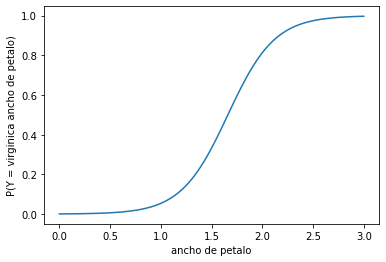

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

x_nuevo = np.linspace(0,3,100).reshape(-1,1)
y_prob = regLog.predict_proba(x_nuevo)

#reshape(-1) necesario para seaborn!!
sns.lineplot(x=x_nuevo.reshape(-1),y=y_prob[:,1].reshape(-1))
plt.xlabel('ancho de petalo')
plt.ylabel('P(Y = virginica ancho de petalo)')
plt.show()

In [7]:
data.dtypes

Largosep    float64
Anchosep    float64
Largopet    float64
Anchopet    float64
clase         int64
dtype: object